# curvefitting_2

In [18]:
random_seed=5
n_points=40
noise_level=0.2

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython import display


# Your existing data generation code
x_min=-2
x_max=2
def f(x): return np.cos(8*x)+x/10

all_x = np.linspace(x_min, x_max, 128)
all_y = f(all_x)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(random_seed) #2 is not bad, 5 is not bad
x=np.random.uniform(x_min, x_max, n_points)
y=f(x)+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

20 20


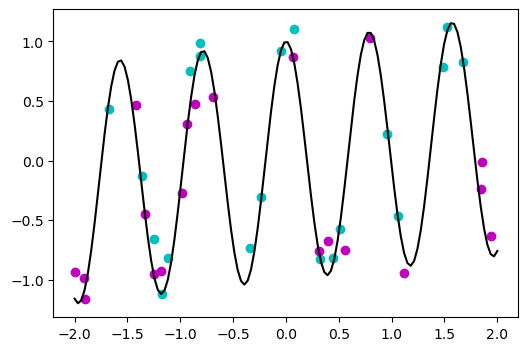

In [20]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
# plt.ylim([-0.5, 2])

In [21]:
# Define 2-layer ReLU network
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size=20):
        super(TwoLayerNet, self).__init__()
        self.layer1 = nn.Linear(1, hidden_size)  # Input to hidden
        self.layer2 = nn.Linear(hidden_size, 1)  # Hidden to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [22]:
# Convert data to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train).reshape(-1, 1)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

In [29]:
def train_that_shit(hidden_units=4, num_epochs=100000, lr=1e-2, seed=5, realtime_viz=False):
    # num_epochs=100000
    # lr=1e-2
    torch.manual_seed(seed)
    train_losses=[]
    test_losses=[]
    
    model = TwoLayerNet(hidden_units)
    criterion = nn.MSELoss()
    # optimizer = optim.SGD(model.parameters(), lr=lr)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        outputs = model(x_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
        if (epoch + 1) % (num_epochs/5) == 0:
            with torch.no_grad():
                test_outputs = model(x_test_tensor)
                test_loss = criterion(test_outputs, y_test_tensor)
            train_losses.append(train_loss.item())
            test_losses.append(test_loss.item())
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
    
            
            with torch.no_grad():
                all_y_hat=model(torch.tensor(all_x).float().view(-1, 1))
            if realtime_viz or epoch==num_epochs-1:
                plt.clf()
                fig=plt.figure(0, (6, 4))
                plt.plot(all_x, all_y, c='k')
                plt.scatter(x_train, y_train, c='c')
                plt.scatter(x_test, y_test, c='m')
                plt.plot(all_x, all_y_hat.numpy(), c='c', linewidth=2)
                # plt.ylim([-0.5, 2])        
                # display.clear_output(wait=True)
                # display.display(plt.gcf())
    return train_losses[-1], test_losses[-1]

Epoch [20000/100000], Train Loss: 0.2332, Test Loss: 1.5106
Epoch [40000/100000], Train Loss: 0.2329, Test Loss: 1.4912
Epoch [60000/100000], Train Loss: 0.2329, Test Loss: 1.4909
Epoch [80000/100000], Train Loss: 0.2330, Test Loss: 1.4946
Epoch [100000/100000], Train Loss: 0.2329, Test Loss: 1.4909


(0.23294806480407715, 1.4908968210220337)

<Figure size 640x480 with 0 Axes>

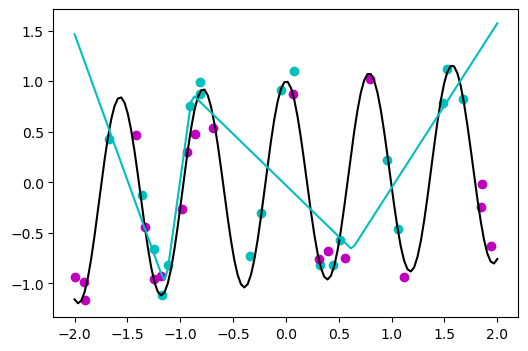

In [28]:
train_that_shit(hidden_units=4, num_epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0314, Test Loss: 1.4853
Epoch [40000/100000], Train Loss: 0.0314, Test Loss: 1.4884
Epoch [60000/100000], Train Loss: 0.0314, Test Loss: 1.5012
Epoch [80000/100000], Train Loss: 0.0314, Test Loss: 1.4875
Epoch [100000/100000], Train Loss: 0.0313, Test Loss: 1.4928


(0.0313429981470108, 1.4927760362625122)

<Figure size 640x480 with 0 Axes>

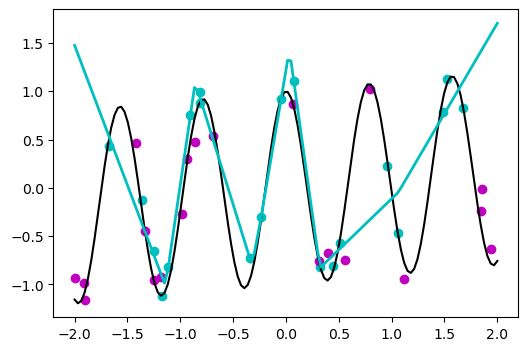

In [30]:
train_that_shit(hidden_units=20, num_epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0179, Test Loss: 1.0731
Epoch [40000/100000], Train Loss: 0.0047, Test Loss: 0.8687
Epoch [60000/100000], Train Loss: 0.0005, Test Loss: 0.9920
Epoch [80000/100000], Train Loss: 0.0003, Test Loss: 0.9252
Epoch [100000/100000], Train Loss: 0.0026, Test Loss: 0.8994


(0.002603440312668681, 0.8993798494338989)

<Figure size 640x480 with 0 Axes>

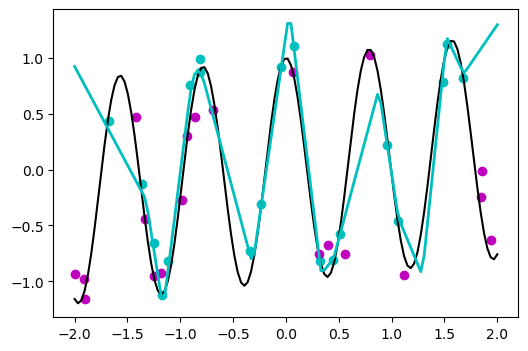

In [31]:
train_that_shit(hidden_units=40, num_epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

Epoch [20000/100000], Train Loss: 0.0132, Test Loss: 1.2509
Epoch [40000/100000], Train Loss: 0.0132, Test Loss: 1.2327
Epoch [60000/100000], Train Loss: 0.0131, Test Loss: 1.2663
Epoch [80000/100000], Train Loss: 0.0132, Test Loss: 1.2242
Epoch [100000/100000], Train Loss: 0.0003, Test Loss: 0.7109


(0.0002666377113200724, 0.7109008431434631)

<Figure size 640x480 with 0 Axes>

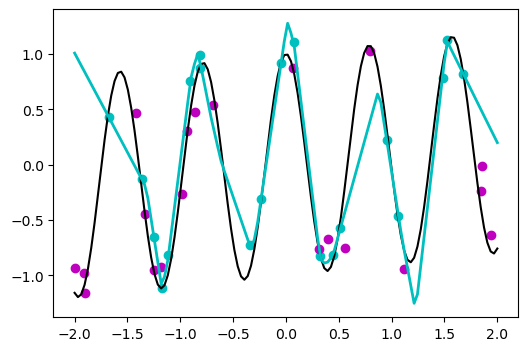

In [32]:
train_that_shit(hidden_units=60, num_epochs=100000, lr=1e-2, seed=5, realtime_viz=False)

hmm ok feeling kinda meh on this shape now - I think like parabola more -> there could be an interesting middle ground of course. 